![example](images/director_shot.jpeg)

#  Microsoft Movie Content Analysis

**Authors:** Thai Hang Nguyen
***

## Overview
***

This project aims to analyze the trends in the movie industry to help Microsoft make informed decisions when launching their new studio and creating video content. The use of visualization graphs helps to analyze the gross profits and ratings of movies produced by other studios. By analyzing these trends, Microsoft can identify successful strategies and make informed decisions when creating new content.

***

## Business Problem

Microsoft is planning to launch a new studio and produce movie content, but they're unsure about how to develop effective strategies to engage with audiences. To assist them in this endeavor, I've utilized resources such as IMDb, Box Office Mojo, and The Numbers to gather relevant information.

***

## Data Understanding

***

In [1]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Yearly gross profit 

*[Box Office Mojo](https://www.boxofficemojo.com/) and *[The Numbers](https://www.the-numbers.com/) website offers insights into the financial performance of each movies produces. The data files provide both types of gross profit made (domestically and internationally) when a studio releases a movie throughout the years (2010 - 2018)


In [2]:
studio_gross = pd.read_csv("zippedData/bom.movie_gross.csv.gz")
release_date = pd.read_csv("zippedData/tn.movie_budgets.csv.gz")

In [3]:
studio_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [4]:
studio_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [5]:
studio_gross.year.describe()

count    3387.000000
mean     2013.958075
std         2.478141
min      2010.000000
25%      2012.000000
50%      2014.000000
75%      2016.000000
max      2018.000000
Name: year, dtype: float64

In [6]:
studio_gross.dtypes

title              object
studio             object
domestic_gross    float64
foreign_gross      object
year                int64
dtype: object

In [7]:
release_date.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [8]:
release_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [9]:
release_date.dtypes

id                    int64
release_date         object
movie                object
production_budget    object
domestic_gross       object
worldwide_gross      object
dtype: object

### Rating & Genres

*[IMDb](https://www.imdb.com/) dataset offers valuable insights into the popularity of different genres based on user reviews and ratings.

In [10]:
rating = pd.read_csv("zippedData/imdb.title.ratings.csv.gz")
genres = pd.read_csv("zippedData/imdb.title.basics.csv.gz")

In [11]:
rating.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [12]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [13]:
rating.describe()

,averagerating,numvotes
count,73856.000000,7.385600e+04
mean,6.332729,3.523662e+03
std,1.474978,3.029402e+04
min,1.000000,5.000000e+00
25%,5.500000,1.400000e+01
50%,6.500000,4.900000e+01
75%,7.400000,2.820000e+02
max,10.000000,1.841066e+06


In [14]:
genres.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [15]:
genres.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [16]:
genres.genres.describe()

count          140736
unique           1085
top       Documentary
freq            32185
Name: genres, dtype: object

## Data Preparation

***

### Data Cleaning and Merging

In the studio gross files, it was decided to rename the "title" columns to "movie" to match the name of the release date columns. I have already searched through each of the files to determine if they have any common gross profit information, which they do. However, due to some missing values in the domestic and foreign gross columns of the studio files, I have decided to work with the release date files instead, as they do not have any missing values. As a result, I have dropped the domestic and foreign gross columns from the studio files.

In [17]:
#Change rename title to Movie, easier to merge dataframe with release date
studio_gross = studio_gross.rename(columns = {"title": "Movie", "studio": "Studio"})

#Droping columns, dataframe of release date have no missing values
studio_gross = studio_gross.drop(columns = ["domestic_gross", "foreign_gross", "year"])


Similarly, in the release date files, I have normalized the columns and removed any unnecessary ones. Since the values under the release date columns are in the form of a string of numbers, I have converted them to float and removed any "$" and "," signs to make it easier for me to calculate the foreign gross by subtracting the domestic gross from the worldwide gross.

In [18]:
#Renaming for easy merge and looks cleanier
release_date = release_date.rename(columns = {"release_date": "Release Date", "movie":"Movie", 
                                              "production_budget": "Production Budget","domestic_gross":"Domestic Gross", 
                                              "worldwide_gross": "Worldwide Gross"})
#Dropping column
release_date = release_date.drop(columns = ["id"])

# Changing the index type from string to float, plus removing $,
release_date[release_date.columns[2:]] = release_date[release_date.columns[2:]].replace("[$,]", "", regex = True).astype(float)


In [19]:
#creating extra column since dataframe release date does not have foreign gross
release_date["Foreign Gross"] = release_date["Worldwide Gross"] - release_date["Domestic Gross"]

The release date file indicates that the dates are represented as strings. To make the data more usable, I have converted the release date to a datetime type and created two additional columns to separate the month and year information. I have decided to drop the original release date column as it is no longer needed.

In [20]:
#changing index of release date from object to datetime64[ns]
release_date["Release Date"] = pd.to_datetime(release_date["Release Date"].astype("datetime64[ns]"))

#Creating another columns specifically for Month and Year only
release_date["Month"] = release_date["Release Date"].apply(lambda x: x.strftime("%B"))
release_date["Year"] = pd.DatetimeIndex(release_date["Release Date"]).year

#droping column release date
release_date = release_date.drop(columns = ["Release Date"])

In [21]:
release_date.dtypes

Movie                 object
Production Budget    float64
Domestic Gross       float64
Worldwide Gross      float64
Foreign Gross        float64
Month                 object
Year                   int64
dtype: object

By combining the studio gross files with the release date file, we can gain a comprehensive understanding of each studio's production budget along with their overall gross profits earned during the month and year in which the movie was released.

In [22]:
df1 = pd.merge(studio_gross, release_date, on = "Movie", how = "inner")
df1

,Movie,Studio,Production Budget,Domestic Gross,Worldwide Gross,Foreign Gross,Month,Year
0,Toy Story 3,BV,200000000.0,415004880.0,1.068880e+09,653874642.0,June,2010
1,Inception,WB,160000000.0,292576195.0,8.355246e+08,542948447.0,July,2010
2,Shrek Forever After,P/DW,165000000.0,238736787.0,7.562447e+08,517507886.0,May,2010
3,The Twilight Saga: Eclipse,Sum.,68000000.0,300531751.0,7.061028e+08,405571077.0,June,2010
4,Iron Man 2,Par.,170000000.0,312433331.0,6.211564e+08,308723058.0,May,2010
...,...,...,...,...,...,...,...,...
1242,Gotti,VE,10000000.0,4286367.0,6.089100e+06,1802733.0,June,2018
1243,Ben is Back,RAtt.,13000000.0,3703182.0,9.633111e+06,5929929.0,December,2018
1244,Bilal: A New Breed of Hero,VE,30000000.0,490973.0,6.485990e+05,157626.0,February,2018
1245,Mandy,RLJ,6000000.0,1214525.0,1.427656e+06,213131.0,September,2018


#### Dataframe of studio average gross profit

After examining df1, I have decided to calculate the average product budget, domestic gross, and foreign gross of each studio, but only for the years between 2014 and 2020. This allows me to eliminate outdated data that may skew the results. Additionally, I will be focusing on the top 5 studios that generate the most average gross profit.

In [23]:
release_date.Year.describe()

count    5782.000000
mean     2003.967139
std        12.724386
min      1915.000000
25%      2000.000000
50%      2007.000000
75%      2012.000000
max      2020.000000
Name: Year, dtype: float64

In [24]:
#reducing the year
df1 = df1[df1["Year"].between(2015,2020)]

In [25]:
#looking at each Production budget, Domestic gross and Foreign gross average gross per studio
#Also looking at the top 10 studio
Pro_mean = df1.groupby("Studio")["Production Budget"].agg(["count", "mean"]).sort_values(by= "mean", ascending = False).head(10)
Dom_mean = df1.groupby("Studio")["Domestic Gross"].agg(["mean"]).sort_values(by= "mean", ascending = False).head(10)
For_mean = df1.groupby("Studio")["Foreign Gross"].agg(["mean"]).sort_values(by= "mean", ascending = False).head(10)

In [26]:
#Merging all the mean budget and gross together
df_mean = pd.merge(Pro_mean, Dom_mean, on = "Studio", how = "inner")
df_total_mean = pd.merge(df_mean, For_mean, on = "Studio", how = "inner")

#renaming the columns as it has changed during the process of grouping
df_total_mean = df_total_mean.rename(columns = {"count": "Count", "mean_x": "Production Budget", 
                                                "mean_y":"Domestic Gross", "mean": "Foreign Gross"})

In [27]:
df_total_mean = df_total_mean.head(5)
df_total_mean

,Count,Production Budget,Domestic Gross,Foreign Gross
Studio,,,,
BV,30,1.603667e+08,2.451714e+08,3.796227e+08
WB,43,9.574419e+07,1.012821e+08,1.666600e+08
Fox,44,7.047727e+07,9.496417e+07,1.729397e+08
Sony,29,5.948276e+07,8.849023e+07,1.463445e+08
Uni.,55,5.584545e+07,1.091271e+08,1.950264e+08


#### Dataframe of release timing

Returning to the original df1 merged files, I aim to analyze the optimal timing for movie releases. With the available data, I can determine which month generates the most gross revenue annually, specifically between 2015 and 2020. To facilitate this analysis, I will drop any unnecessary columns from the dataset.

In [28]:
#droping columns
movie_release = df1.drop(columns = ["Movie", "Studio", "Production Budget", "Foreign Gross"])

#grouping year and month by the mean values of worldwide gross
movie_release = movie_release.groupby(["Year", "Month"]).mean()

#resetting the index 
movie_release = movie_release.reset_index()

movie_release.head()

,Year,Month,Domestic Gross,Worldwide Gross
0,2015,April,5.525260e+07,1.798086e+08
1,2015,August,4.130870e+07,7.381663e+07
2,2015,December,6.116069e+07,1.451838e+08
3,2015,February,7.102868e+07,1.908726e+08
4,2015,January,3.331934e+07,7.928416e+07


#### Dataframe of  Genres rating 

By combining the genres and ratings files, I can obtain information on the number of votes and ratings per movie, as well as the genre of the movie that was released during a particular year.

In [29]:
#merging 2 datdframe
df2 = pd.merge(genres, rating, on = "tconst", how = "inner")
df2

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...,...,...,...
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136
73853,tt9914642,Albatross,Albatross,2017,NaN,Documentary,8.5,8
73854,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,NaN,6.6,5


I have filtered the files to include only movies released between 2016 and 2020, with a rating above 6.5 and a minimum of 100,000 review votes. This approach allows me to eliminate irrelevant data such as outdated movies or those with few reviews, which could potentially affect the rating of the genres. Furthermore, this helps me to gain a better understanding of the movies that viewers are currently interested in.

In [30]:
#The data has been filtered to include only movies released between 2016 and 2020, with a rating above 6.5 
    #and a minimum of 100,000 review votes.
df2 = df2[(df2.averagerating > 6.5) & (df2.numvotes > 100000) & (df2.start_year.between(2015,2020))]

#columns under genres have more than one, im splitting them up
split_genres = (df2.assign(genres = df2["genres"].str.split(",")).explode("genres").groupby(["start_year", "genres"]).mean())


#resetting the index
df2 = split_genres.reset_index()

#renaming columns to look neater
df2 = df2.rename(columns = {'start_year': 'Year', 'genres': 'Genres', 'runtime_minutes': 'Run time Minutes', 
                            'averagerating': 'Average Rating', 'numvotes': 'Number of Votes'})

df2.head()

C:\Users\Thai Ha\AppData\Local\Temp\ipykernel_10820\1601694812.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  split_genres = (df2.assign(genres = df2["genres"].str.split(",")).explode("genres").groupby(["start_year", "genres"]).mean())


,Year,Genres,Run time Minutes,Average Rating,Number of Votes
0,2015,Action,129.125000,7.275000,401953.125000
1,2015,Adventure,128.733333,7.420000,444399.866667
2,2015,Animation,95.000000,8.200000,536181.000000
3,2015,Biography,129.500000,7.320000,207553.700000
4,2015,Comedy,114.111111,7.355556,275558.333333


## Evaluation

***

### High average gross profit

BV is the top earning studio making over 400,000,000 USD dollars with a notably high production budget. while studio also exhibited relatively revenue, under 200,000,000 USD dollars. By understanding which studios have historically been successful in terms of revenue, we can draw useful insights for devising strategies for creating new video content that have the potential to generate significant revenue.


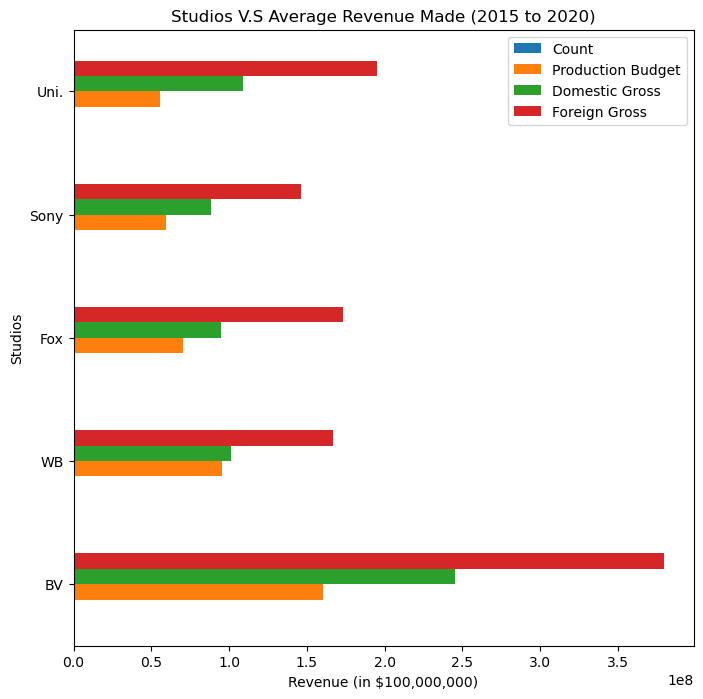

In [31]:
df_total_mean.plot(kind = "barh", figsize = (8, 8))

plt.xlabel("Revenue (in $100,000,000 USD)")
plt.ylabel("Studios")

plt.title("Studios V.S Average Revenue Made (2015 to 2020)")
plt.legend(loc = "upper right")

plt.show()

### Best timing to release movie

From the graph, we can see that certain months tend to have higher gross revenue than others. May and June appear to be the most successful months for movie releases, while January and August tend to have lower revenue. Additionally, the graph allows us to observe any patterns or trends in the revenue data over the years.


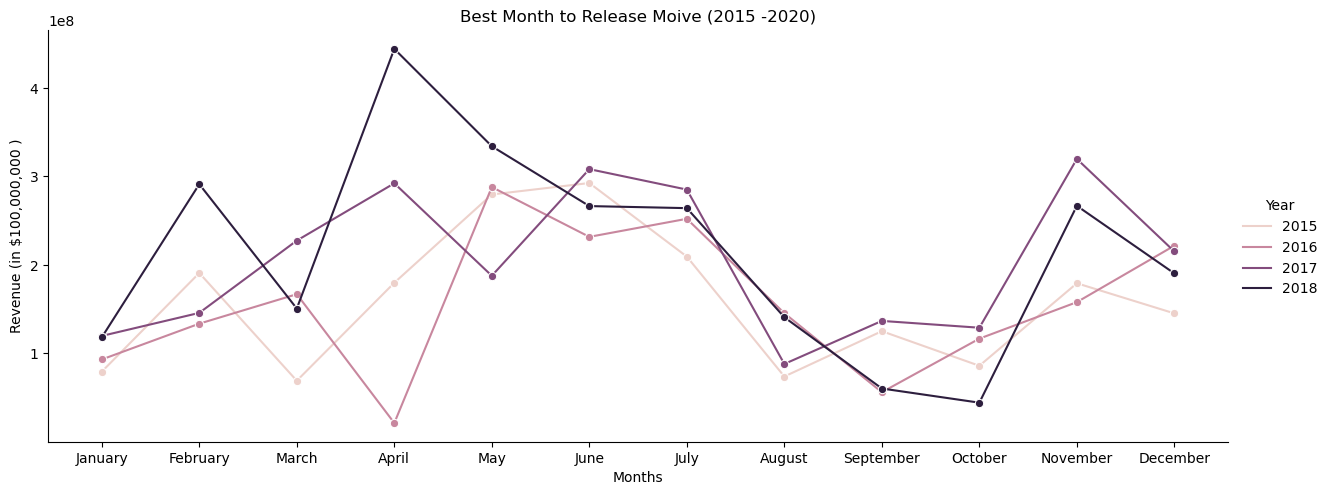

In [32]:
from calendar import month_name as mn
months = mn[1:]
movie_release.Month = pd.Categorical(movie_release.Month, categories = months, ordered = True)
p = sns.relplot(kind = "line", data = movie_release, x = "Month", 
                y = "Worldwide Gross", hue = "Year",
                aspect=2.5, marker='o')
plt.xlabel("Months")
plt.ylabel("Revenue (in $100,000,000 USD)")
plt.title("Best Month to Release Moive (2015 -2020)")
plt.show()

### High genres rating

Looking at the graph, it's evident that the genre "war" has a notably higher average rating than any other movie genre. Music comes in as the second-highest rated genre, while the others are similar and on par with slight differences.


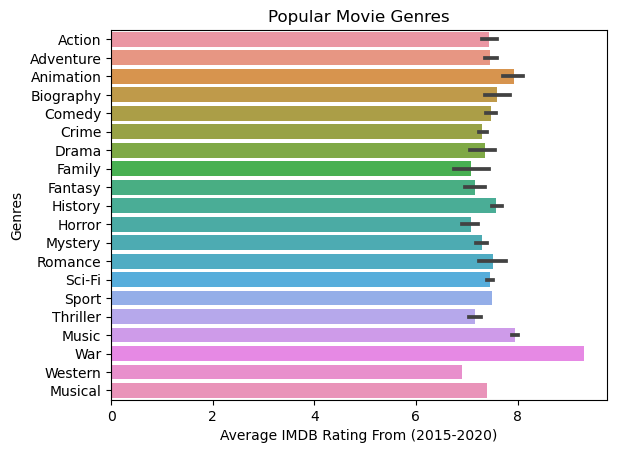

In [33]:
p = sns.barplot(data = df2, x = "Average Rating", y = "Genres", orient = "h")
plt.title("Popular Movie Genres")
plt.xlabel("Average IMDB Rating From (2015-2020)")
plt.show()

## Conclusions

Here are three recommendations for Microsoft as they launch their new movie studio with creative video content:

* **Emulate successful strategies of competitors:** By studying the successful strategies of competitors such as BV studio, Microsoft can identify areas for improvement and adjust their own strategies to improve their chances of success.


* **Release movies in May and June:** Based on the analysis of the data, releasing movies during the months of May and June is the best time to release movies to gain more audiences.


* **Focus on the top genres:** The analysis showed that the top genres are war, music, and animation. Creating video content based on these genres will help Microsoft gain more audience and engage with them as these are currently popular and of interest to the audience.

### Next steps

Further insights or improvemnets that could be made with the data:

* **Examining the relationship between production budget and revenue for different genres.** This could help microsoft determine which genre are more profitable and worth investing in.

* **Analysing audience demographics and perferences for different genres.** This could provide insights into the target audience for each genre and how effectively market to them.

* **Incoporating data on streaming platforms:** Such as Netflix and Amazone Prime to gain more comprehensive undestanding of audience preferences and viewing habits